# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key
units = "Metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | portrush
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | brisas de zicatela
Processing Record 4 of Set 1 | udachny
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | edinburgh of the seven seas
Processing Record 7 of Set 1 | sao gabriel da cachoeira
Processing Record 8 of Set 1 | east london
Processing Record 9 of Set 1 | la passe
Processing Record 10 of Set 1 | bridgewater
Processing Record 11 of Set 1 | atherton
Processing Record 12 of Set 1 | port mathurin
Processing Record 13 of Set 1 | castanos
Processing Record 14 of Set 1 | flying fish cove
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | klyuchi
Processing Record 18 of Set 1 | nizao
Processing Record 19 of Set 1 | canutama
Processing Record 20 of Set 1 | minas de marcona
Processing Record 21 of Set 1 | montepuez
Processing Re

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,portrush,55.1959,-6.6493,10.34,91,65,4.15,GB,1689565760
1,ushuaia,-54.8000,-68.3000,0.81,75,40,1.54,AR,1689565760
2,brisas de zicatela,15.8369,-97.0419,26.64,83,100,1.52,MX,1689565760
3,udachny,66.4167,112.4000,10.25,87,100,5.22,RU,1689565760
4,port-aux-francais,-49.3500,70.2167,2.19,61,91,7.04,TF,1689565760


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,portrush,55.1959,-6.6493,10.34,91,65,4.15,GB,1689565760
1,ushuaia,-54.8000,-68.3000,0.81,75,40,1.54,AR,1689565760
2,brisas de zicatela,15.8369,-97.0419,26.64,83,100,1.52,MX,1689565760
3,udachny,66.4167,112.4000,10.25,87,100,5.22,RU,1689565760
4,port-aux-francais,-49.3500,70.2167,2.19,61,91,7.04,TF,1689565760


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

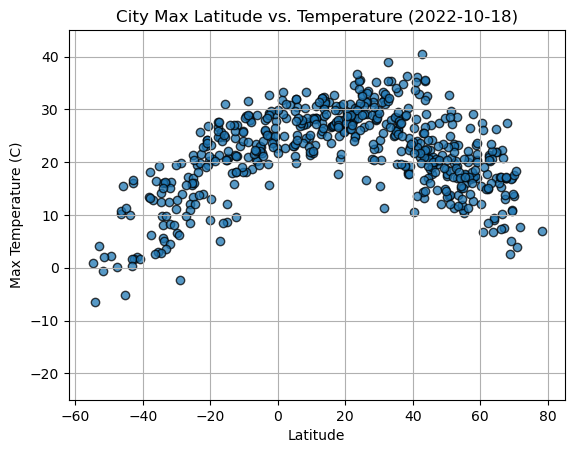

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black", alpha=0.75)
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Incorporate the other graph properties
plt.xlim(-62, 85)
plt.ylim(-25, 45)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

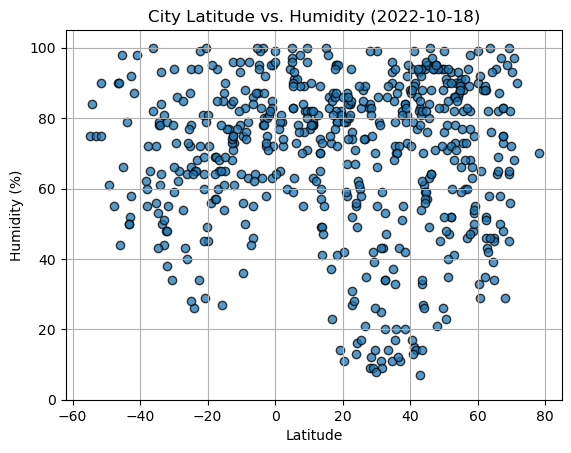

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Incorporate the other graph properties
plt.xlim(-62, 85)
plt.ylim(0, 105)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

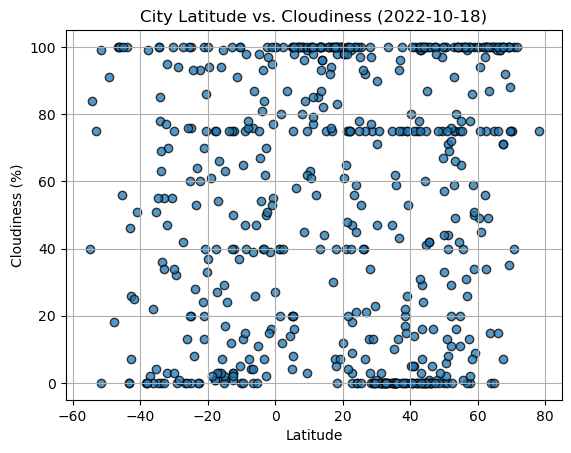

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Incorporate the other graph properties
plt.xlim(-62, 85)
plt.ylim(-5, 105)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

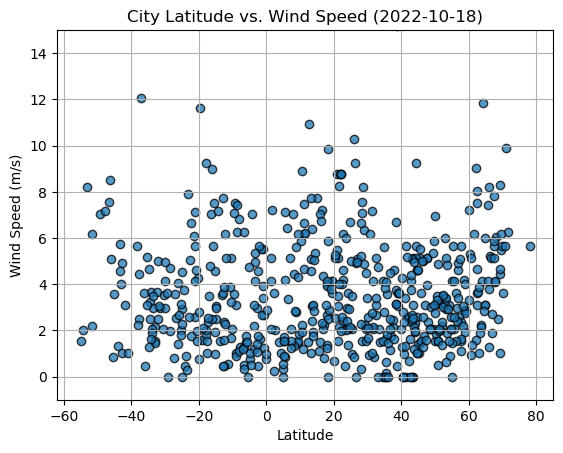

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Incorporate the other graph properties
plt.xlim(-62, 85)
plt.ylim(-1, 15)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
#x_values = TBA
#y_values = TBD
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,portrush,55.1959,-6.6493,10.34,91,65,4.15,GB,1689565760
2,brisas de zicatela,15.8369,-97.0419,26.64,83,100,1.52,MX,1689565760
3,udachny,66.4167,112.4000,10.25,87,100,5.22,RU,1689565760
8,la passe,45.5549,-0.8967,17.77,80,1,1.47,FR,1689565761
9,bridgewater,44.3835,-64.5155,21.17,94,100,5.66,CA,1689565761


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ushuaia,-54.8000,-68.3000,0.81,75,40,1.54,AR,1689565760
4,port-aux-francais,-49.3500,70.2167,2.19,61,91,7.04,TF,1689565760
5,edinburgh of the seven seas,-37.0676,-12.3116,12.89,65,2,12.08,SH,1689565760
6,sao gabriel da cachoeira,-0.1303,-67.0892,22.61,99,100,0.78,BR,1689565760
7,east london,-33.0153,27.9116,16.12,44,55,2.15,ZA,1689565761


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6337574327543587


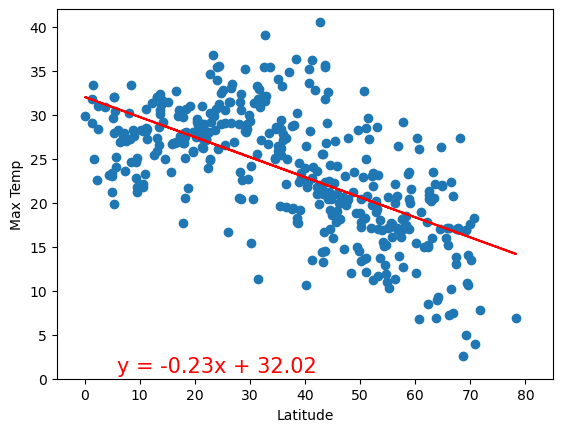

In [17]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.xlim(-5, 85)
plt.ylim(0, 42)

print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.781184294170091


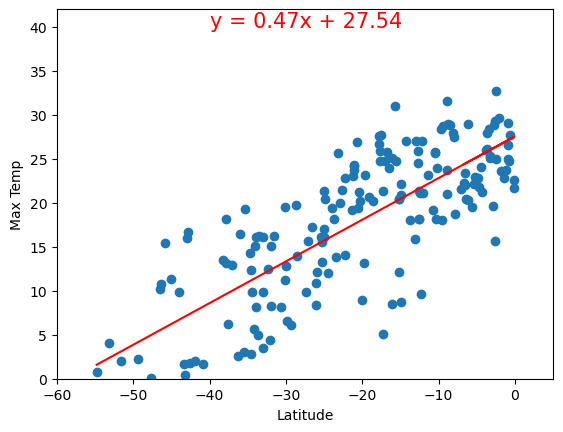

In [18]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.xlim(-60, 5)
plt.ylim(0, 42)

print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** 
The two previous charts are comparing the relationship between maximum temperature and latitude in the northern and southern hemispheres.
Northern hemisphere: there is a negative correlation between max temp and latitude. Max temps tend to be higher at lower latitudes.
Southern hemisphere: there is a positive correlation between max temp and latitude. Max temps increase as latitude increases.
In other words, for this city sample maximum temp will decrease the further away you move from the equator and as you move closer to the equator, maximum temp will increase.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.0320714878336134


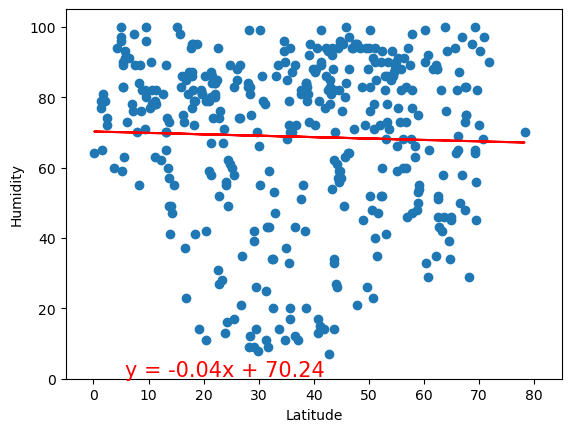

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.xlim(-5, 85)
plt.ylim(0, 105)

print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.19282605661880067


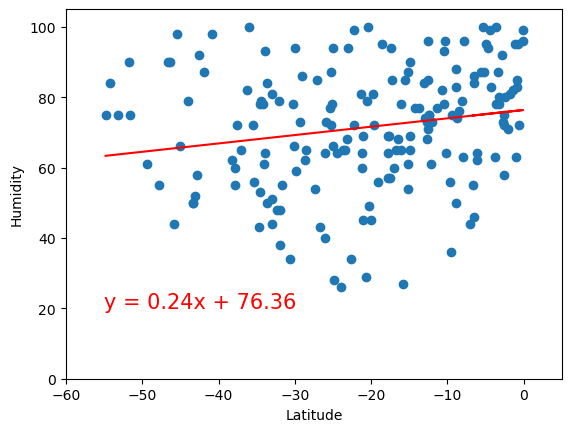

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.xlim(-60, 5)
plt.ylim(0, 105)

print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** 
The two previous charts are comparing the relationship between humidity and latitude in the northern and southern hemispheres.
Northern hemisphere: there is a minimal negative correlation between humidity and latitude. There is a slight decrease in humidity as you move away from the equator.
Southern hemisphere: there is a slight positive correlation between humidity and latitude. Humidity may increase as you move closer to the equator.
Since the values are so close to zero, we cannot correlate the variables for this study's city sample.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.012031135055095604


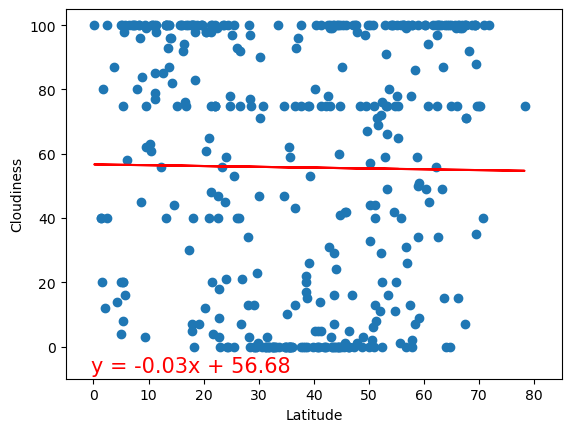

In [29]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-0.5,-8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.xlim(-5, 85)
plt.ylim(-10, 105)

print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.0020991820295449782


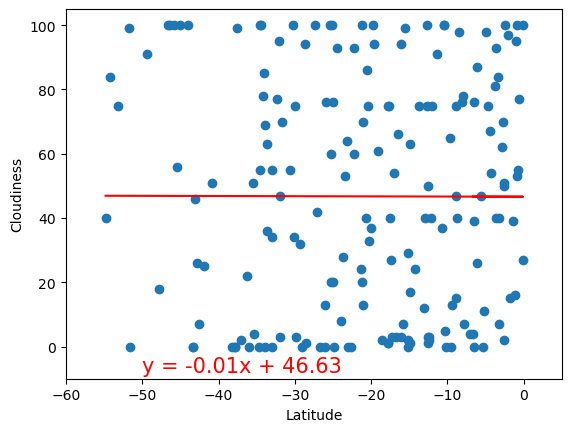

In [37]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,-8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.xlim(-60, 5)
plt.ylim(-10, 105)

print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** 
The two previous charts are comparing the relationship between cloudiness and latitude in the northern and southern hemispheres.
For both hemispheres I found that there is a minimal negative correlation between cloudiness and latitude. Since the values are so close to zero, we cannot correlate the variables for this study's city sample.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.04118300395981133


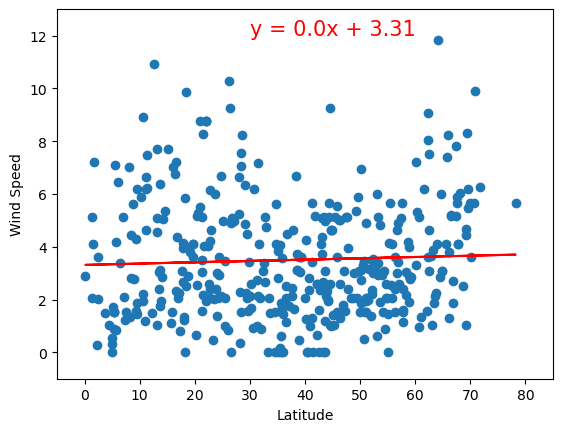

In [43]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,12),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.xlim(-5, 85)
plt.ylim(-1, 13)

print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.13593040851147778


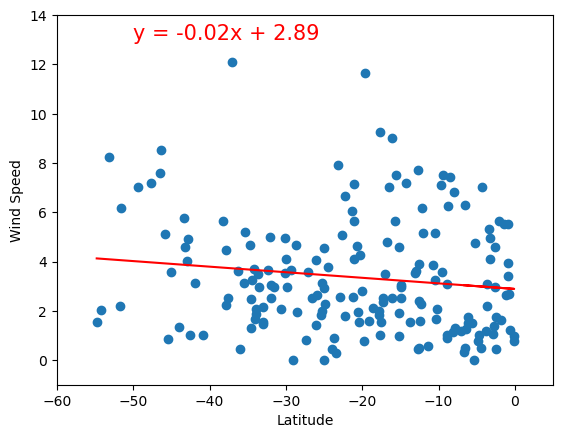

In [46]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,13),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.xlim(-60, 5)
plt.ylim(-1, 14)

print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** 
The two previous charts are comparing city sample relationships between wind speed and latitude in the northern and southern hemispheres.
Northern hemisphere: there is a minimal positive correlation between wind speed and latitude. There is a slight increase in wind speed as you move away from the equator.
Southern hemisphere: there is a slight negative correlation between wind speed and latitude. Wind may decrease as you move closer to the equator.